# Crop Recommendation Using Machine Learning

This project recommends the best crop for cultivation based on certain soil and weather conditions. The goal is to help farmers make data-driven decisions and improve agricultural productivity.

### Objectives:
- Use soil and weather parameters to predict the most suitable crop.
- Build and evaluate a machine learning model for accurate predictions.

**Dataset**: [Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) by Atharva Ingle.

### Dataset Overview

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
# Load the dataset
file_path = 'Crop_recommendation_dataset.csv'
crop_data = pd.read_csv(file_path)

# Display the first few rows
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Dataset Description:
- **Rainfall (mm)**: The amount of rainfall.
- **Soil pH**: Acidity or alkalinity of the soil.
- **Temperature (°C)**: Average temperature.
- **Nitrogen (N), Phosphorus (P), Potassium (K)**: Essential nutrients in the soil.
- **Relative Humidity (%)**: The percentage of moisture in the air.
- **Label**: The recommended crop.

The dataset contains `2200 rows` and `8 columns`.


### Exploratory Data Analysis (EDA)

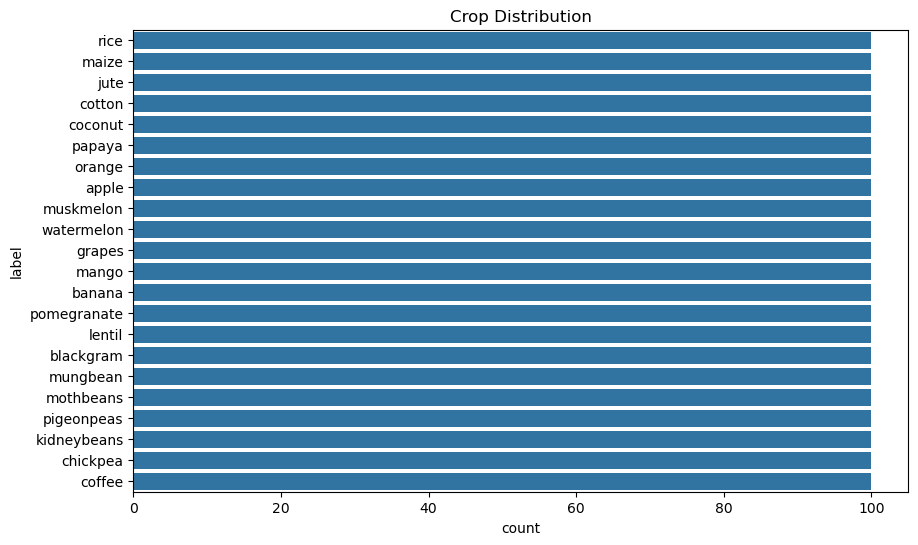

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
crop_data.describe()

# Check for missing values
crop_data.isnull().sum()

# Distribution of crops
plt.figure(figsize=(10, 6))
sns.countplot(y=crop_data['label'], order=crop_data['label'].value_counts().index)
plt.title('Crop Distribution')
plt.show()

### Observations:
- No missing values in the dataset.
- The dataset includes diverse crops, ensuring a balanced model.

### Target Labels Encoding

In [13]:
#   Target labels encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
crop_data['label_encoded'] = label_encoder.fit_transform(crop_data['label'])

#   Mapping btw encodaded labels and crop names
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Label Mapping:\n", label_mapping)

Label Mapping:
 {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


### Data Standardization
Standardizing the features ensures they are on the same scale, which is particularly important for models that depend on distance metrics or gradients.

In [15]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variables
X = crop_data.drop(columns=['label', 'label_encoded'])
y = crop_data['label_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Log column names for reference
print("Feature columns used in training:", X.columns.to_list())

Feature columns used in training: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


## Model Training and Evaluation
We train a Random Forest Classifier, evaluate its performance using accuracy, confusion matrix, and classification report, and visualize feature importance.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_rept = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matx = confusion_matrix(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", class_rept)
print("Confusion Matrix:\n", conf_matx)

Model Accuracy: 99.55%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00

### Observations:
- The model achieved an accuracy of **99.55%**.
- Precision, recall, and F1-score are high for most crops.

### Feature Importance
Visualizing the importance of features helps us understand which features contribute the most to the predictions.

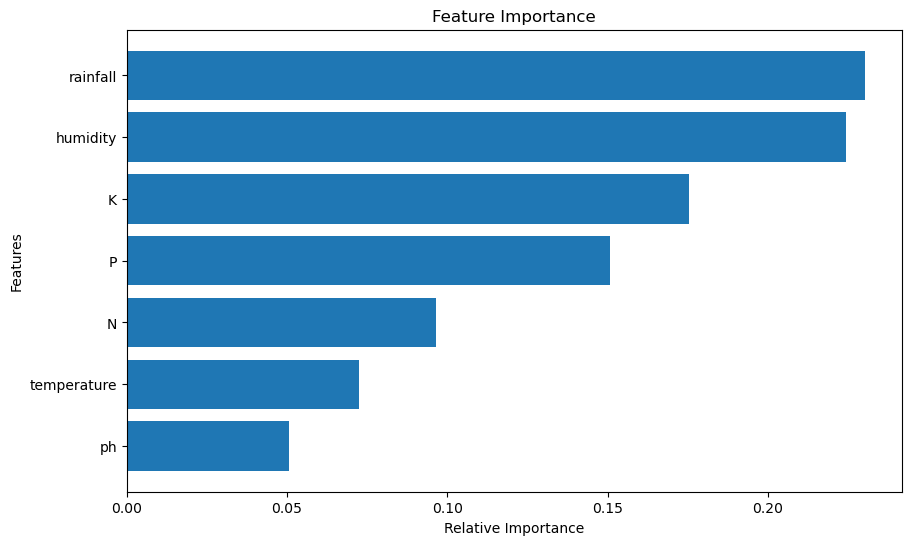

In [19]:
# Feature importance visualization
feature_importance = random_forest.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(features[indices], feature_importance[indices], align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()


## Saving and Loading the Model
We save the trained model, scaler, and label encoder for future use. This allows us to make predictions without retraining the model.

In [21]:
import pickle

# Save the model and preprocessing objects
with open('crop_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(random_forest, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

### Loading the Saved Model
We demonstrate how to load the saved model and use it for predictions.

In [23]:
# Load the saved model and preprocessing objects
with open('crop_recommendation_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('label_encoder.pkl', 'rb') as encoder_file:
    loaded_encoder = pickle.load(encoder_file)

## User Input for Prediction
We allow users to input environmental conditions, scale the data using the saved scaler, and predict the most suitable crop.

In [25]:
def get_user_input():
    try:
        print("\nEnter the following values for prediction:")
        n = float(input("Nitrogen (N): "))
        p = float(input("Phosphorous (P): "))
        k = float(input("Potassium (K): "))
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Relative Humidity (%): "))
        ph = float(input("Soil pH: "))
        rainfall = float(input("Rainfall (mm): "))

        # Create a DataFrame with proper feature names
        data = pd.DataFrame({
            'N': [n],
            'P': [p],
            'K': [k],
            'temperature': [temperature],
            'humidity': [humidity],
            'ph': [ph],
            'rainfall': [rainfall]
        }, columns=X.columns)  # Dynamically match training columns
        return data
    except ValueError:
        print("Invalid inputs. Please enter numeric values only.")
        return None

In [27]:
def predict_crop(input_features, model, scaler, label_encoder):
    if input_features is not None:
        # Scale the features
        scaled_features = scaler.transform(input_features)
        # Predict using the model
        prediction = model.predict(scaled_features)
        # Decode predictions to crop names
        crop_name = label_encoder.inverse_transform(prediction)
        return crop_name[0]
    else:
        return None

### Predicting the Crop
Run the following cell to interactively predict the crop based on user-provided inputs.

In [29]:
if __name__ == "__main__":
    input_features = get_user_input()

    if input_features is not None:
        predicted_crop = predict_crop(input_features, loaded_model, loaded_scaler, loaded_encoder)
        print(f"The recommended crop for the given conditions is: {predicted_crop}")
    else:
        print("Failed to provide valid input.")


Enter the following values for prediction:


Nitrogen (N):  45
Phosphorous (P):  46
Potassium (K):  38
Temperature (°C):  39
Relative Humidity (%):  300
Soil pH:  8
Rainfall (mm):  200


The recommended crop for the given conditions is: papaya


### Conclusion:
- A Random Forest Classifier was used to predict the most suitable crop based on soil and weather conditions.
- The model provides valuable insights for farmers and agricultural experts.

### Future Work:
- Include additional features like soil type and geographic location.
- Deploy the model as a web application for real-time recommendations.


### References:
- Dataset: [Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) by Atharva Ingle.
- Scikit-learn Documentation: https://scikit-learn.org/

### Acknowledgments:
- Thanks to Atharva Ingle for providing the dataset.